In [35]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import os

In [38]:
iris = pd.read_csv("C:/Users/Administrator/Downloads/Iris.csv")

In [39]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [40]:
from sklearn.preprocessing import LabelEncoder
enn = LabelEncoder()
iris['Species_n'] = enn.fit_transform(iris['Species'])
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_n
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [14]:
X = iris.drop(['Species', 'Species_n'], axis='columns')
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [16]:
y = iris['Species_n']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species_n, dtype: int32

In [17]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X,y, \
                                        test_size=0.3, random_state = 200)

In [23]:
import sklearn.tree as tree
my_model = tree.DecisionTreeClassifier(max_depth = 5, random_state=200 )
my_model.fit(X_train,y_train)
my_model.score(X_train,y_train)

1.0

In [24]:
import sklearn.metrics as metrics
my_model.predict_proba(X_test)

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [26]:
import pydotplus
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

In [29]:
dot_data = tree.export_graphviz(my_model, out_file=None, \
                    feature_names=X.columns, \
                    filled=True, rounded= True, special_characters=True, \
                               proportion= True)

In [30]:
graph = pydotplus.graph_from_dot_data(dot_data)

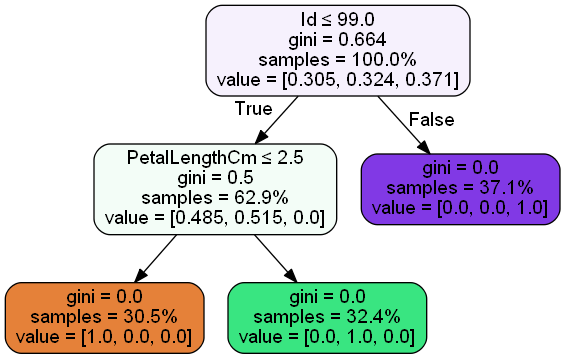

In [31]:
from IPython.display import Image
Image(graph.create_png())